# Visualise Parcellated FC Data

Code to visualise ADNI FMRI data that has been cleaned (confounds regressed out) and parcellated according to the `Schaefer2018_116Parcels_7Networks_order_FSLMNI152_2mm` parcellation (found in `data/`)

The confounds regressed out follows the protocol from the paper: “A synergistic core for human brain evolution and cognition”, _Luppi et al_

In [1]:
import pandas as pd
import numpy as np 
import json
from scipy.io import loadmat
import matplotlib.pyplot as plt 
import sys
import os

FC_SOURCE_DIR = '../FMRI_ADNI_DATA/fc'
OUTPUT_DIR = 'fc_trials/visualise_parcellated'

In [2]:
data = loadmat(f'{FC_SOURCE_DIR}/sub-ADNI006S4363_ses-M006_task-rest_space-MNI152Lin_res-2_desc-preproc_bold_ExtSchaefer116_ROI_activity.mat')
fc = data['ROI_activity']

# fig, ax = plt.subplots(1, 1, figsize=(7, 4))
# ax.imshow(fc_emp, cmap='bwr')

Want to plot the average FC matrix per visit session. Visit sessions: ['M000', 'M006', 'M012', 'M024', 'M036', 'M060', 'M072', 'M084', 'M096', 'M120', 'M144', 'M174', 'M048', 'M150', 'M162', 'M108', 'M156', 'M168', 'M186', 'M132', 'M180', 'M138', 'M204', 'M018', 'M198', 'M192', 'M126', 'M102', 'M078', 'M090', 'M114', 'M066','M054', 'M042', 'M030']

In [3]:
def normalise_correlate_fc(fc):
    fc_emp = fc / np.max(fc)
    fc_emp = np.corrcoef(fc_emp)
    return fc_emp

In [4]:
# get average for a subset of fc data

def get_avg_fc(files):
    corr_matrices = []

    for file in files:
        data = loadmat(file)['ROI_activity']
        fc = normalise_correlate_fc(data)
        corr_matrices.append(fc)

    stacked_corr = np.stack(corr_matrices, axis = 0)
    avg_corr = np.mean(stacked_corr, axis =0)
    
    return avg_corr

In [5]:
def get_session_files(files, visit):
#     return list(filter(lambda x: visit in x, files))
    return [file for file in files if visit in file]

In [6]:
fmri_filenames = [os.path.join(FC_SOURCE_DIR, file) for file in os.listdir(FC_SOURCE_DIR) if file.endswith('.mat')]

VISCODE:  M000


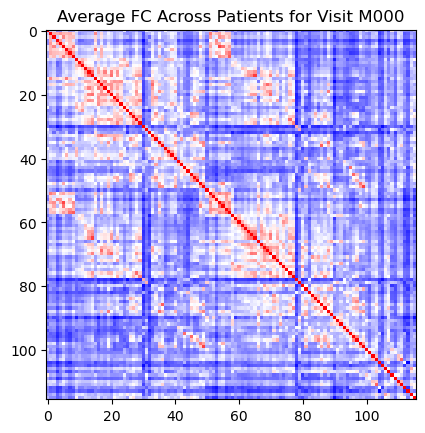

VISCODE:  M006


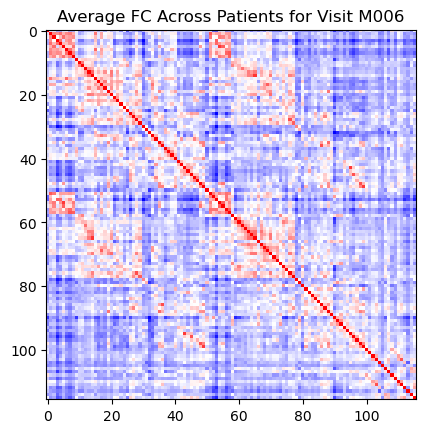

VISCODE:  M012


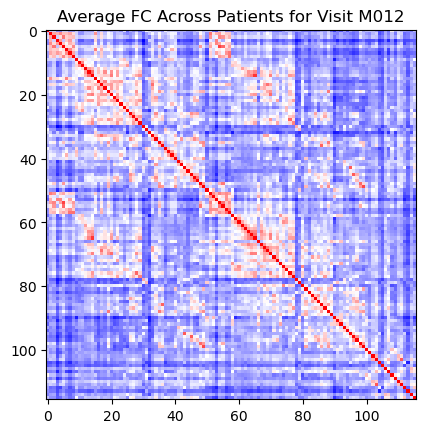

VISCODE:  M018


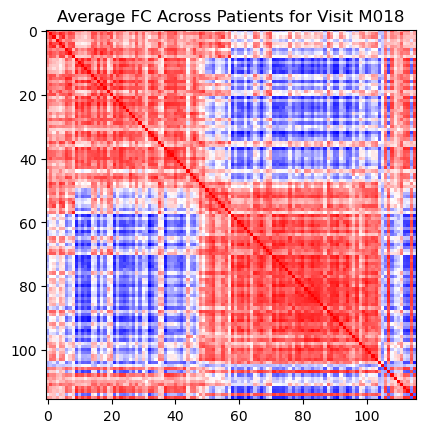

VISCODE:  M024


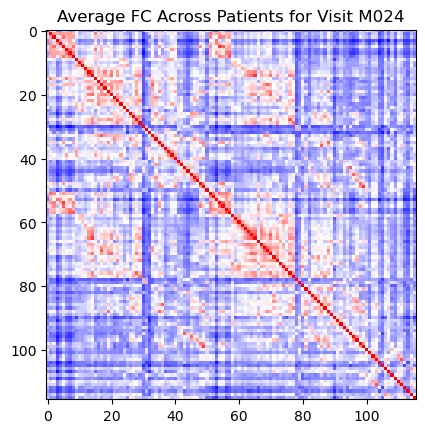

VISCODE:  M030


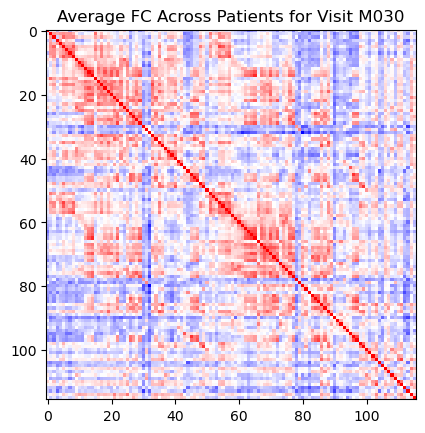

VISCODE:  M036


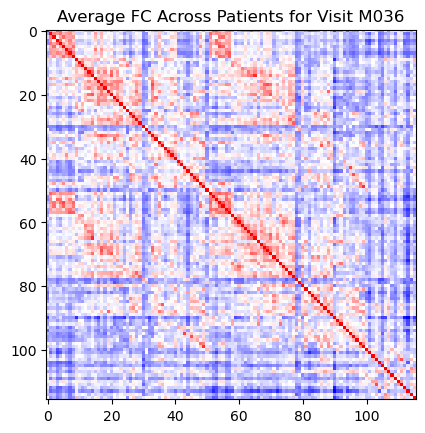

VISCODE:  M042


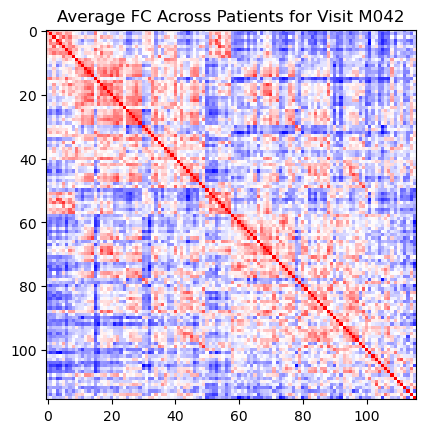

VISCODE:  M048


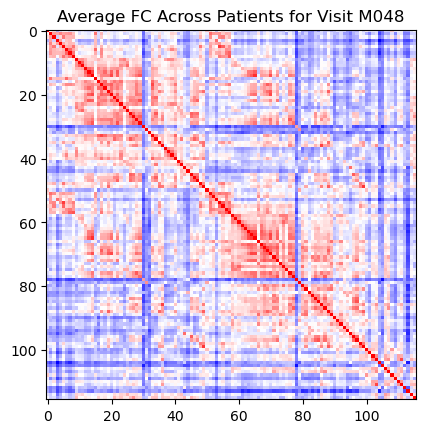

VISCODE:  M054


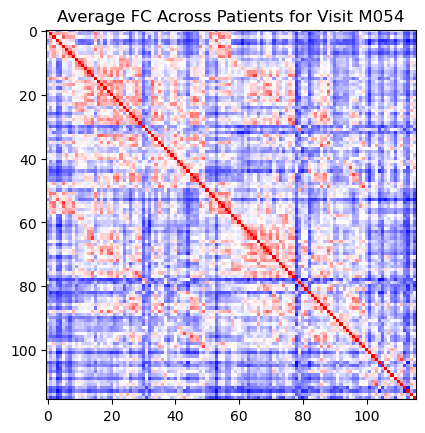

VISCODE:  M060


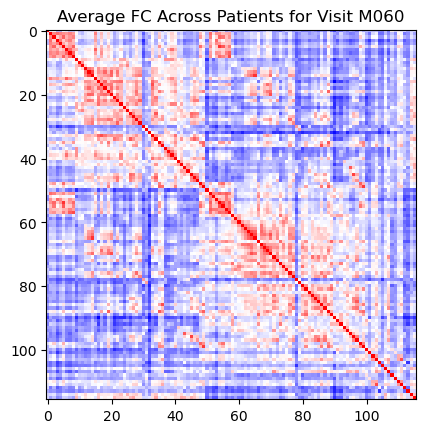

VISCODE:  M066


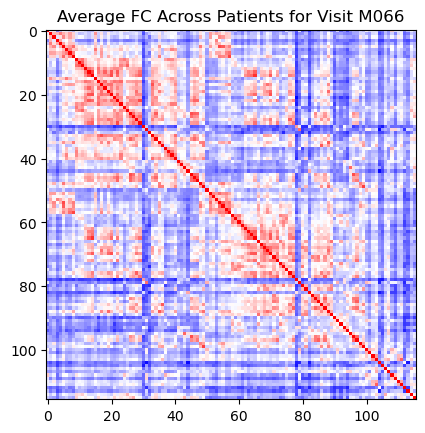

VISCODE:  M072


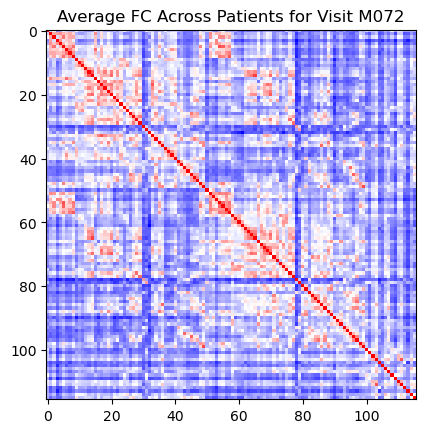

VISCODE:  M078


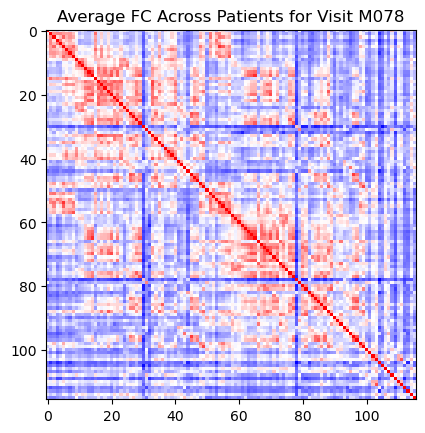

VISCODE:  M084


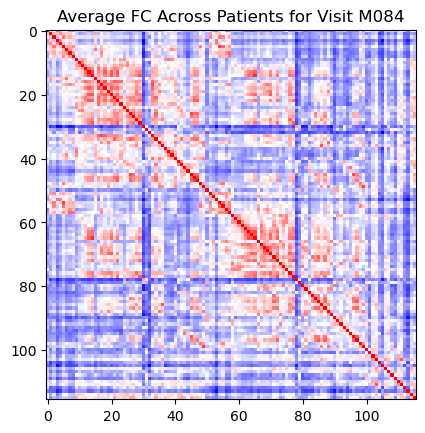

VISCODE:  M090


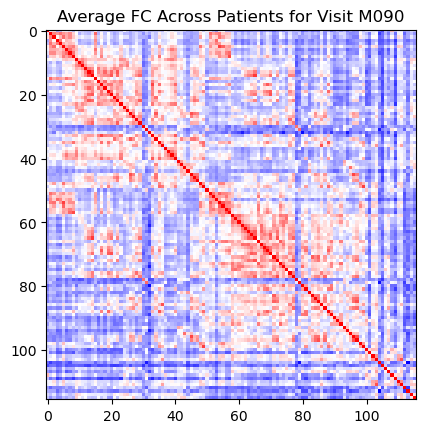

VISCODE:  M096


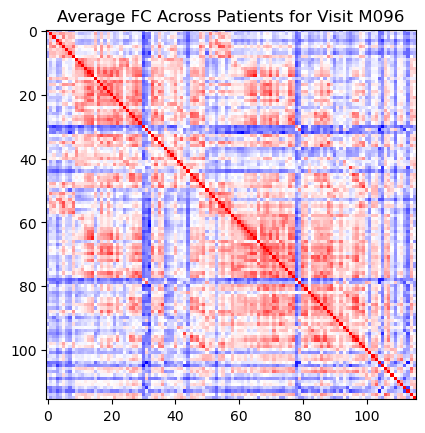

VISCODE:  M102


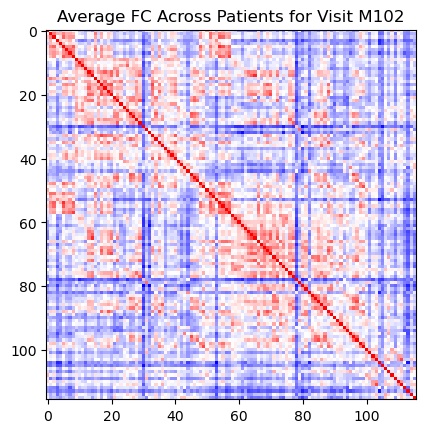

VISCODE:  M108


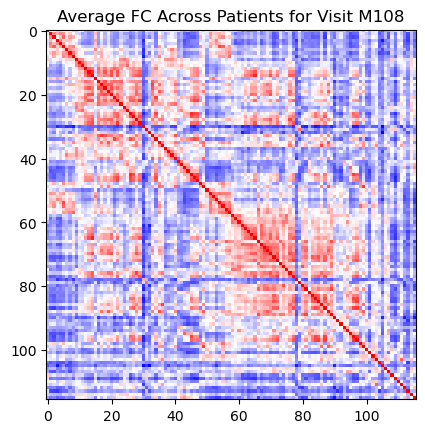

VISCODE:  M114


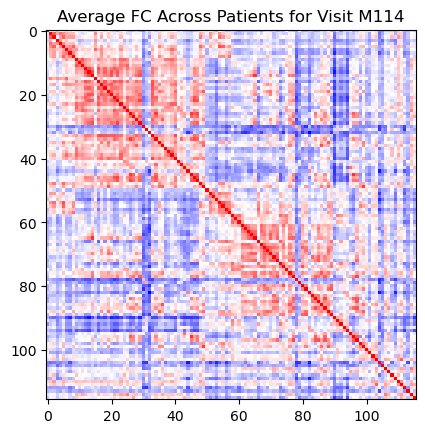

VISCODE:  M120


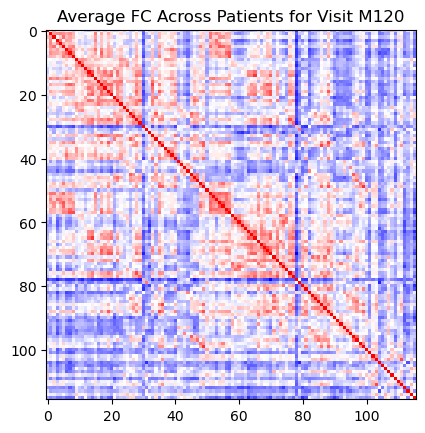

VISCODE:  M126


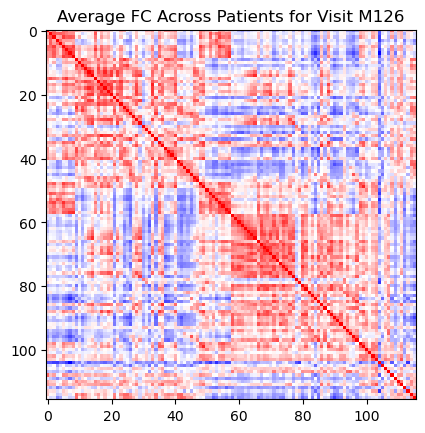

VISCODE:  M132


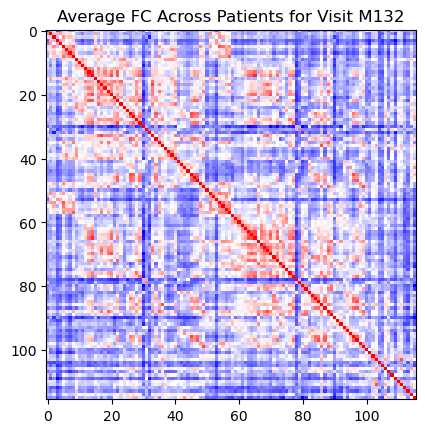

VISCODE:  M138


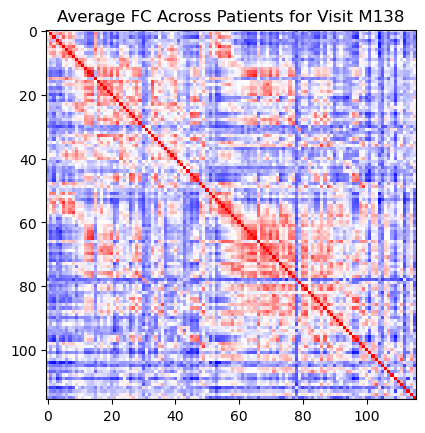

VISCODE:  M144


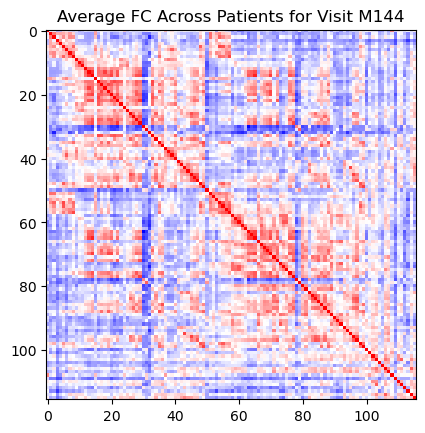

VISCODE:  M150


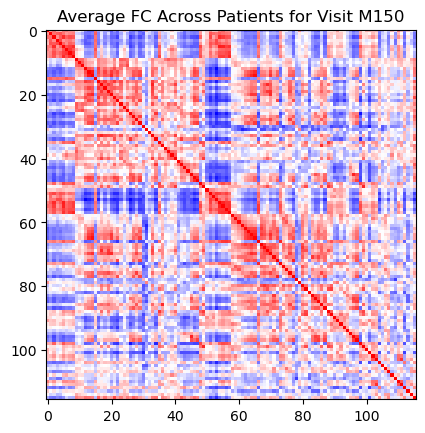

VISCODE:  M156


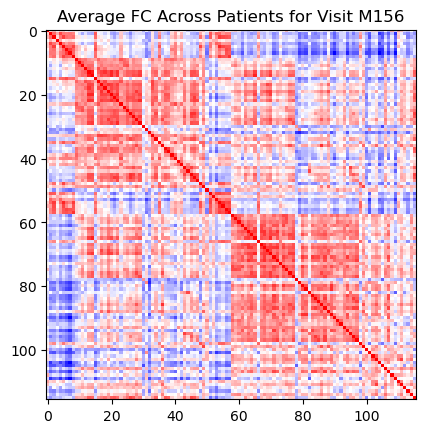

VISCODE:  M162


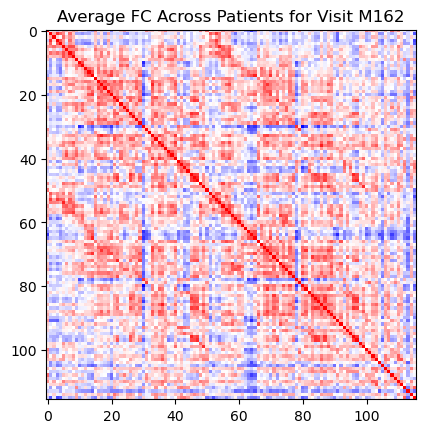

VISCODE:  M168


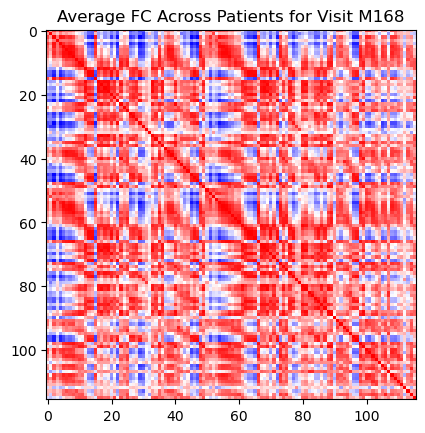

VISCODE:  M174


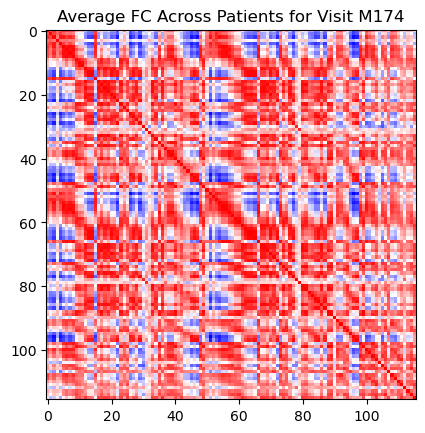

VISCODE:  M180


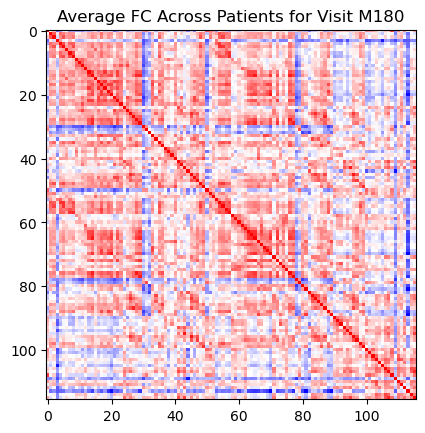

VISCODE:  M186


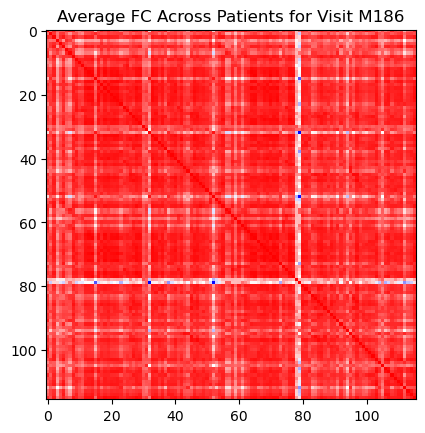

VISCODE:  M192


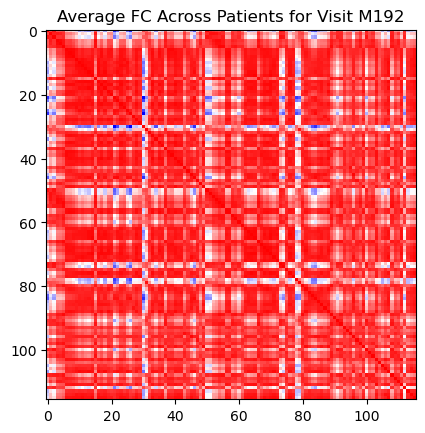

In [9]:
VISCODES = [
    'M000','M006','M012','M018','M024','M030','M036','M042',
    'M048','M054','M060','M066','M072','M078','M084','M090',
    'M096','M102','M108','M114','M120','M126','M132','M138',
    'M144','M150','M156','M162','M168','M174','M180','M186',
    'M192'
]

for code in VISCODES:
    print("VISCODE: ", code)
    files = get_session_files(fmri_filenames, code)
    if len(files) > 0:
        avg_fc = get_avg_fc(files)

        plt.imshow(avg_fc, cmap='bwr')
        plt.title(f'Average FC Across Patients for Visit {code}')
        plt.axis('on')

        plt.savefig(f'{OUTPUT_DIR}/avg_fc_{code}.png')
        plt.show()


In [46]:
get_session_files(fmri_filenames, 'M204')

[]